In [1]:
import sys
# sys.path.append('C://Users/Wian/Documents/BEng(Hons)/CBT/Skogestad-Python')
sys.path.append('/home/wian/Documents/BEng_Hons/Skogestad-Python/')

In [2]:
import utils
import numpy
import matplotlib.pyplot as plt
import sympy
sympy.init_printing()
%matplotlib inline

In [3]:
G11 = utils.tf([4.29], [6.7, 1])#, deadtime = 2.6)
G12 = utils.tf([-2.38], [8.64, 1])#, deadtime = 3.5)
G13 = utils.tf([-2.156], [9.06, 1])#, deadtime = 1)
G21 = utils.tf([7.215], [3.25, 1])#, deadtime = 6.5)
G22 = utils.tf([-9.218], [5.0, 1])#, deadtime = 3)
G23 = utils.tf([-2.156], [9.06, 1])#, deadtime = 1)
G31 = utils.tf([-0.5635], [8.15, 1])#, deadtime = 9.2)
G32 = utils.tf([0.451143], [10.9, 1])#, deadtime = 9.4)
G33 = utils.tf([1.1*10.1, 1.1*0.87], [3.89*18.8, 18.8+3.89, 1])#, deadtime = 1)

In [4]:
G = utils.mimotf([[G11, G12, G13], [G21, G22, G23], [G31, G32, G33]])

In [22]:
Poles, Zeros, _ = utils.poles_and_zeros_of_square_tf_matrix(G)
Zeros

array([-0.30769231, -0.25706941, -0.2       , -0.14925373, -0.12269939,
       -0.11574074, -0.11037528, -0.09174312, -0.05319149])

In [25]:
utils.pole_zero_directions(G, Zeros, 'p')

[(-0.30769230769939515, matrix([[1.00000000e+00],
          [7.71179273e-08],
          [5.43286971e-09]]), matrix([[-1.82051753e-08],
          [ 1.00000000e+00],
          [ 1.68366035e-09]]), [True]),
 (-0.2570694088400579, matrix([[ 4.0387627e-08],
          [-1.9649361e-08],
          [ 1.0000000e+00]]), matrix([[1.27326271e-07],
          [1.27326382e-07],
          [1.00000000e+00]]), [True]),
 (-0.1999999999893038, matrix([[ 1.11934983e-07],
          [-1.00000000e+00],
          [ 1.44175130e-08]]), matrix([[-1.77518406e-08],
          [ 1.00000000e+00],
          [ 2.07601260e-09]]), [True]),
 (-0.14925373135787534, matrix([[-1.00000000e+00],
          [-1.27628144e-07],
          [-9.50404489e-08]]), matrix([[-1.00000000e+00],
          [-2.17564786e-07],
          [-4.04294281e-08]]), [True]),
 (-0.12269938601975446, matrix([[-1.00000000e+00],
          [-2.02678339e-07],
          [ 9.01245875e-08]]), matrix([[-3.6549546e-06],
          [-1.8190002e-06],
          [ 1.0000

Text(0, 0.5, 'Imagenary Axis')

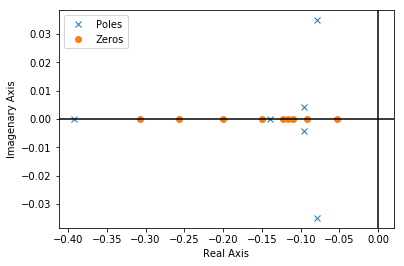

In [27]:
plt.plot(numpy.real(Poles), numpy.imag(Poles), 'x', label="Poles")
plt.plot(numpy.real(Zeros), numpy.imag(Zeros), 'o', label="Zeros")
plt.axhline([0], color = 'k')
plt.axvline([0], color = 'k')
plt.legend(loc = 0)
plt.xlabel("Real Axis")
plt.ylabel("Imagenary Axis")

In [7]:
utils.RGA(G(0))

array([[ 2.11123578, -0.84907281, -0.26216297],
       [-0.59035419,  1.67068873, -0.08033454],
       [-0.52088159,  0.17838408,  1.34249751]])

In [100]:
# A,B,C,D = utils.tf2ss(G)
Loop = utils.mimotf(G[0,0]) * utils.mimotf((numpy.eye(3) + G)[0,0].inverse())

Loop = sympy.simplify(utils.mimotf2sym(Loop)[0])
Loop = utils.sym2mimotf(Loop)
utils.tf2ss(Loop)

23 36


AssertionError: 

In [47]:
import utilsplot
import control
import slycot

In [48]:
utilsplot.step(G)

TypeError: iteration over a 0-d array

<Figure size 432x288 with 0 Axes>

In [ ]:
t = numpy.linspace(0, 120, 1000)
Gss = control.ss2tf(A,B,C,D)
t, y = control.step_response(Gss, t)
y

In [ ]:
plt.plot(t,y[0])
plt.plot(t,y[1])
plt.plot(t,y[2])